# Data Science Fundamentals
## Predicting Fuel Efficiency: A Practical Toy Example with the `Auto MPG` Dataset

© 2025, 2026 Yvan Richard.   
*All rights reserved.*

This notebook introduces core concepts in data science and machine learning through structured exploration of a real-world dataset, focusing on data meaning, structure, and limitations rather than model optimisation.

## Table of Contents
1. <a href = "#part1">Motivation and Scope</a>     
2. <a href = "#part2">Data Loading, Description, and Initial Inspection</a>
3. <a href = "#part3">Exploratory Data Analysis</a>    
4. <a href = "#part4">Domain Knowledge</a>
5. <a href = "#part5">Quality of Fit and Train-Test Split</a>
6. <a href = "#part6">Further Steps</a>

## <a id = "part1" style = "color: inherit;">1. Motivation and Scope</a>



### 1.1. Data Science and Machine Learning

As outlined in the introduction, the role of a data scientist can be broadly characterised as the extraction of meaningful insights from complex and often imperfect data. When the objective is to understand or predict relationships between variables, this process typically takes the form of *statistical learning* or *machine learning*. In this setting, the analyst seeks to approximate an unknown function $ f $ that maps a set of predictors $ X = \{X_1, X_2, \ldots, X_p\} $ to a response variable $ Y $, up to an irreducible random error term $ \varepsilon $, assumed to be independent of $ X $ and to have zero mean:

$$
Y = f(X) + \varepsilon
$$

This formulation provides a unifying framework for a wide range of predictive and inferential tasks encountered in applied data science.

### 1.2.  The Early Steps

The objective of this notebook is to illustrate the stages that precede formal modelling in a data science or machine learning workflow. In practice, the majority of time and effort in applied projects is not devoted to model estimation, but rather to data acquisition, cleaning, validation, and exploratory data analysis (EDA). These preliminary steps are critical, as they determine both the feasibility of downstream modelling and the reliability of any conclusions drawn from it.

To ground this discussion in a concrete example, this notebook works with the well-known *Auto MPG* dataset, which records technical characteristics of automobiles and their fuel efficiency. While the dataset is modest in size, it exhibits several features typical of real-world data, including measurement heterogeneity, missing values, and variables whose interpretation requires domain understanding.

The analysis deliberately avoids model optimisation or performance evaluation. Instead, the focus is on developing intuition about the data-generating process, understanding the meaning and limitations of the available variables, and identifying potential challenges that must be addressed before any modelling exercise can be undertaken. In doing so, the notebook aims to provide a simplified but representative illustration of how the early stages of a data mining or machine learning pipeline are typically structured in practice.

## <a id = "part2" style = "color: inherit;"> 2. Data Loading, Description, and Initial Inspection</a>

### 2.1. Data Loading

The first step in any data science workflow consists of loading the raw dataset and performing an initial inspection. At this stage, the objective is not to transform or clean the data, but rather to understand its basic structure, scale, and content. This includes identifying the number of observations and variables, examining variable names, and verifying that the data has been imported correctly.

Such an initial inspection serves two purposes. First, it provides a coarse understanding of the dataset and its dimensionality, which has direct implications for downstream modelling choices. Second, it allows the analyst to detect obvious issues early on, such as unexpected data types, encoding problems, or missing values that may not be immediately apparent.

In what follows, the *Auto MPG* dataset is loaded in its raw form and examined using simple descriptive tools.

In [11]:
# essential libraries for data manipulation and visualization
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for enhanced visualizations

# loading the original auto mpg dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
data = auto_mpg.data.original
  
# metadata
print("Dataset Metadata:")
print(auto_mpg.metadata)

# convert to a single DataFrame for easier manipulation
data = pd.DataFrame(data)

# display first few rows of the dataset
data.head()

Dataset Metadata:
{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unk

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


**Data Loading Procedure**

As the code indicates, this data set is loaded in its original version according to the instructions provided by UC Irvine who repertoriates numerous famous machine learning datasets on their <a href = "https://archive.ics.uci.edu/datasets">website</a>. Usually, the data acquisition part is far more tedious than what we just did. Indeed, it is the role of *data engineers* to create efficient pipeline to pool a large amount amount of data from various sources and organize them cleanly/efficiently in a database, read-to-use for the data scientist. Furthermore, if the API used above does not work properly, you may find a slightly different version of the data set in the [data directory](data/) of this sub-project.

### 2.2. Data Description

Once the data have been collected and stored, the data scientist proceeds to examine them in order to understand what they represent, the information they contain, and the frequency at which they are observed. This data description step consists in systematically characterizing each variable in the dataset and clarifying its meaning, scale, and temporal structure.

In [12]:
# basic structure of the dataset
print("\nDataset Structure:")
print(data.info())


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


The data.info() function is particularly useful for obtaining an initial overview of a dataset’s structure. It provides a concise summary of all variable names, the number of non-null observations for each variable, and their associated data types, while reminding the analyst to verify how missing values are encoded (in the present case, they are encoded as `NaN`, thus are detected by the function `data.info()`).

**Variables Description**

*Official documentation*

> This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute.  The original dataset is available in the file "auto-mpg.data-original".
> 
> The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)"

This is already very informative. The business case we face is to predict the miles per gallon (mpg) / fuel efficiency of a particular car model according to 3 multivalued discrete variables and 5 continuous real variables. The variables are described more carefully below:

| Variable        | Type      | Description                                                                 |
|-----------------|-----------|-----------------------------------------------------------------------------|
| `car_name`      | object    | Textual identifier of the vehicle. This variable uniquely labels observations but does not carry numerical meaning. |
| `cylinders`     | int64     | Discrete numerical variable indicating the number of cylinders in the engine. Takes a small set of integer values. |
| `displacement`  | float64   | Continuous numerical variable measuring engine size. Larger values indicate larger engines. |
| `horsepower`    | float64   | Continuous numerical variable representing engine power. Contains missing values, which must be addressed during preprocessing. |
| `weight`        | int64     | Numerical variable indicating the mass of the vehicle. |
| `acceleration` | float64   | Continuous variable measuring the time needed for the vehicle to reach a given speed. Higher values correspond to slower acceleration. |
| `model_year`    | int64     | Integer variable indicating the production year of the vehicle. Can be treated as ordinal or temporal. |
| `origin`        | int64     | Categorical variable encoded as integers. It represents the country of origin |
| `mpg`           | float64   | Continuous numerical variable measuring fuel efficiency in miles per gallon. **target variable** |

Of course, a deeper undertstanding of all the variables would require more expertise and attention but since it is only a small showcase project, we accomodate the brevity of the explanations.

### 2.3. Missing Values

Before the exploratory data analysis (EDA) phase, we examine which variable present missing values and we briefly talk about **imputation strategies**.

In [13]:
# missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


**Handling Missing Values is a Delicate Matter!**

As shown, only a single variable—`horsepower`—contains missing observations, representing approximately 1.5% of the sample. This setting is deliberately simplistic; in real-world applications, data acquisition and preprocessing are typically far more complex and time-consuming. Nevertheless, this example suffices to introduce core methodological issues in data science.

Once missingness has been identified, a critical question concerns its underlying mechanism: why are these values missing, and does their absence convey information about the response variable $y$ (here, `mpg`)? These considerations are central to sound empirical analysis, yet they are often difficult to address in practice due to limited knowledge of the data-generating or recording process. In particular, assumptions commonly invoked at this stage, such as "*missingness occurring completely at random*", can be problematic, especially in causal settings, as they may undermine both the statistical validity and theoretical credibility of the results. Consequently, the treatment of missing data should be regarded as a substantive modelling decision rather than a purely mechanical preprocessing step.

**Methods for Handling Missing Values**

[Emmanuel et al. (2021, p. 1)](documentation/Emmanuel_et_al_2021.pdf) explain that "the seriousness of missing values depend in part on how much data is missing, the pattern of missing data, and the
mechanism underlying the missingness of the data". In their paper *A survey on missing data in machine
learning*, they identify several techniques for handling missing values.

They review missing-data handling methods by organizing them along increasing levels of statistical and algorithmic sophistication, with a clear emphasis on imputation-based approaches. At the most basic level, the authors discuss **deletion strategies**, including **listwise deletion** (every case that has one or more missing values is removed) and pairwise deletion (less restrictive but generally not favoured). While computationally simple, these methods are shown to be statistically valid only under the strong assumption that data are **missing completely at random (MCAR)**.

---

Let $X \in \mathbb{R}^{n \times p}$ denote the feature matrix, and let $x_i \in \mathbb{R}^p$ be the $i$-th observation.
Define a row-level missingness indicator $m_i$ as

$$
m_i =
\begin{cases}
0, & \text{if all entries in } x_i \text{ are observed}, \\
1, & \text{if at least one entry in } x_i \text{ is missing}.
\end{cases}
$$

The data are said to be **Missing Completely at Random (MCAR)** if the probability that an observation is incomplete
does not depend on the values of the variables in that observation (nor on any other data values), that is

$$
P(m_i \mid x_i) = P(m_i).
$$

Equivalently, missingness is statistically independent of the data-generating process for $X$.
Under MCAR, the observed sample forms an unbiased subsample of the full dataset.

---


In most practical settings, this assumption is implausible, and deletion can therefore induce biased estimates and substantial information loss, especially when missingness is systematic or the sample size is limited. **However, at this stage the reader must make a clear distinction between a machine learning based approach (causal links are not discussed) or an inference appraoch where assumptions credibility do matter!**

The paper then examines single-imputation techniques, where missing values are replaced by a single estimated quantity. Simple imputations such as mean, median, or mode substitution are commonly used as baseline methods due to their ease of implementation (this is what we do here), but they are criticized for distorting the marginal distributions of variables, attenuating variance, and biasing downstream analyses. **Regression-based imputation** improves on this by exploiting relationships between variables, replacing missing values with conditional predictions derived from observed data.

A substantial portion of the survey is also devoted to **machine-learning-based imputation methods**. Distance-based approaches such as $k$-nearest neighbors (KNN) imputation estimate missing values using local similarity in feature space and are flexible across data types, but they are computationally expensive and may introduce spurious associations. Tree-based methods, particularly random-forest imputation (e.g. `missForest`), iteratively predict missing values using ensembles of decision trees and are shown to perform well in nonlinear and mixed-type data without strong distributional assumptions.

Overall, we understand that plenty of approaches exist but we must be careful that the one we select respect the scope and assumptions of our project.

**Mean Based Imputation with `Auto MPG`**

In our case, we select an easy appraoch, namely mean based imputation, which means that missing values are replaced by the mean of the distribution of the feature `horsepower`. I do not use the most efficient approach but rather choose one where the process is explicit:

In [14]:
# mean based imputation for 'horsepower' column
data['hp_missing'] = data['horsepower'].isnull().astype(int)  # indicator for missingness 0 or 1

# using numpy to compute mean
mean_hp = np.nanmean(data['horsepower'])

# np.where(condition, value_if_true, value_if_false) -> vectorized form of conditional assignment
data['horsepower'] = np.where(data['hp_missing'] == 1, mean_hp, data['horsepower'])

# verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
car_name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
hp_missing      0
dtype: int64


We have finally *cleaned* the `Auto MPG` data set. Now that this is done, we move to a part called exploratory data analysis (EDA).

## <a id = "part3" style = "color: inherit;"> 3. Exploratory Data Analysis</a>

**The Role of EDA**

As [Behrens (1997, p. 132)](documentation/Behrens1997EDA.pdf) states, "the goal of EDA is to discover patterns in data […] until a plausible story of the data is apparent".
During EDA, the researcher systematically examines the data to identify regularities, assess relationships, and formulate tentative hypotheses, whether or not these are initially grounded in formal theory. This stage plays a critical role in subsequent phases of a machine learning project. First, it facilitates the identification of features $x_i \in X$ that exhibit linear or non-linear associations with the target variable $y$, thereby providing insight into their potential predictive relevance. Second, an improved understanding of interdependencies among variables informs the design of meaningful transformations during feature engineering and data scaling. Ultimately, predictive performance depends not only on model choice, but also on the extent to which insights gained during this exploratory phase are effectively incorporated into the modelling process.

**How to Structure an EDA?**

A rigorous EDA is typically structured from broad diagnostic checks to progressively more targeted investigations. It begins with data auditing (verifying data types, units, missingness patterns, duplicates, and obvious inconsistencies; we already completed this step) followed by **univariate summaries** (studying the variables in isolation) that characterize each variable’s distribution (central tendency, dispersion, skewness, outliers) and assess whether transformations may be required. The analysis then moves to bivariate and multivariate exploration to examine associations between predictors and the target, detect non-linearities, interactions, and confounding, and evaluate collinearity and redundancy among features. Throughout, we should document each finding as a testable hypothesis or modelling implication (e.g., candidate features, transformations, segmentation, or robustness checks), while ensuring that all exploratory steps respect the eventual evaluation design (e.g., avoiding leakage by computing summaries using only training data when relevant).

**EDA with `Auto MPG`**

In this subsection, I perform a brief EDA to display some useful plotting techniques with `Matplotlib` and `Seaborn`. As indicated above, I start with a univariate exploration and proceed further with multivariate exploration.

### 3.1. Univariate EDA

First, it is always interesting to compute the **summary statistics** of the numerical features (note that I do not perform a data split yet but this won't introduce data leakage). This steps allow us to detect gross anomalies in the data (e.g. negative values for `horsepower`, ...).

In [ ]:
# summary statistics of the dataset
print("\nSummary Statistics:")
df_sum_stats = data.describe().T # I use .T (transpose) for better readability
df_sum_stats


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
hp_missing,398.0,0.015075,0.122006,0.0,0.000,0.0,0.000,1.0


This first inspection does not reveal any specific anomalies in the data but already provides useful insights:

- `model_year`: the examination period goes from 1970 to 1982.
- `origin`: the cars originate from three countries / regions
- `displacement`: this variable seems widely dispersed around its mean.

**The Histogram Plot**

The histogram plot is a classic plot that allows us to apprehend the empirical distribution of a variable. At this stage, I also note that I usually opt for a minimalistic style for my plots (e.g. no useless text or color) and I encourage the reader to do the same. Indeed, the readability of a plot is crucial when we want to transmit convincingly information about our data and the literature encourages to maximize the data information / ink ratio! It is also important to maintain a consistent plotting style.

Below, I produce some histogram plots.

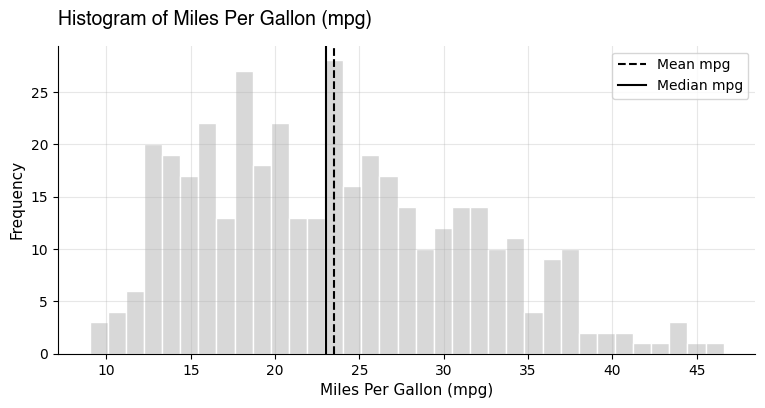

In [ ]:
# histogram of 'mpg' (miles per gallon)
fig, ax = plt.subplots(figsize=(9, 4))

# histogram plot (bins define the number of bars in the histogram, i.e. the granularity of the distribution)
sns.histplot(data['mpg'], bins=35, kde=False, color='grey', edgecolor='white', alpha = 0.3, ax=ax)
ax.axvline(data['mpg'].mean(), color='black', linestyle='--', linewidth=1.5, label='Mean mpg')
ax.axvline(data['mpg'].median(), color='black', linestyle='-', linewidth=1.5, label='Median mpg')
ax.legend()

# customizing the plot
ax.set_title('Histogram of Miles Per Gallon (mpg)',
             family = "Helvetica", fontsize=14, loc = 'left', pad = 15)
ax.set_xlabel('Miles Per Gallon (mpg)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show the plot
plt.show()

In my humble opinion, the above plot is a nice example of a minimal and polished design. On the interpretation side, nothing particular stands out here: no extreme outliers, not a particular shape for the distribution (roughly centered around its mean like a Gaussian). We can produce hisograms for the others continuous real variables:

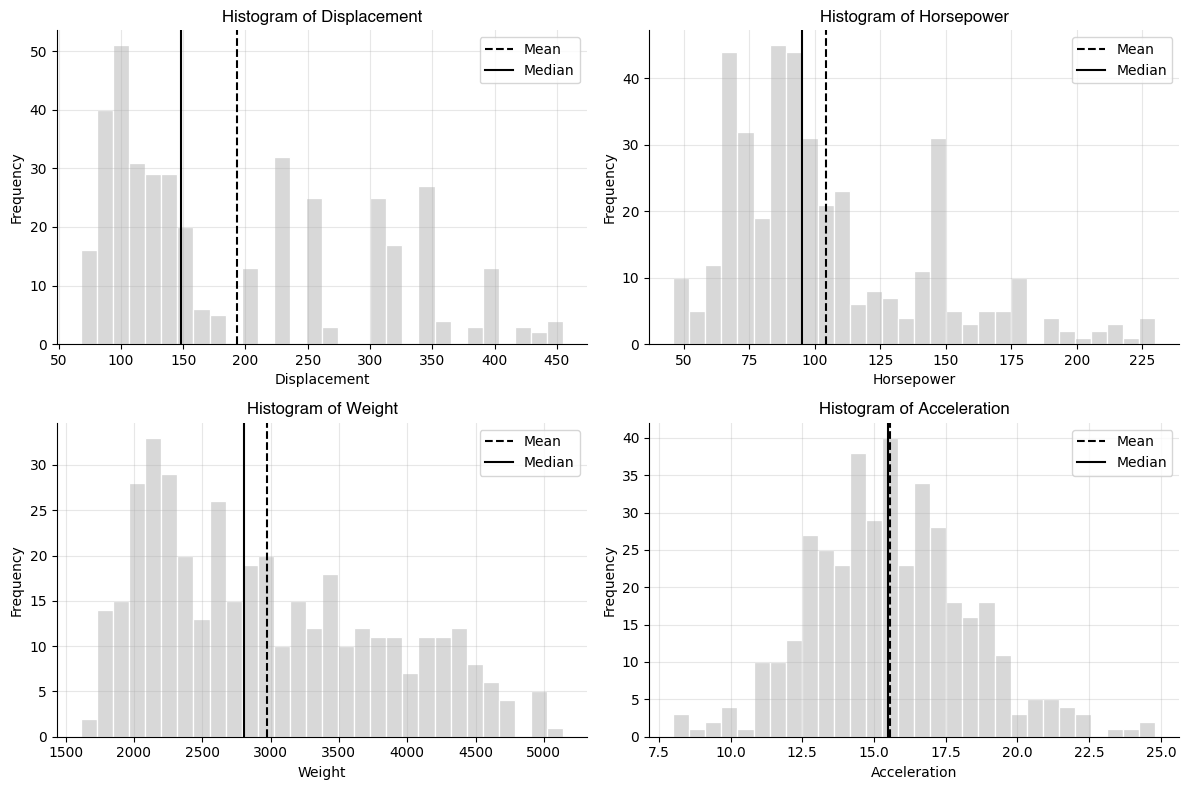

In [42]:
# selected variables
selected_vars = ['displacement', 'horsepower', 'weight', 'acceleration']

# histograms for selected variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# I use a loop to avoid code repetition
for i, var in enumerate(selected_vars):
    sns.histplot(data[var], bins=30, kde=False, color='grey', edgecolor='white', alpha=0.3, ax=axes[i])
    axes[i].axvline(data[var].mean(), color='black', linestyle='--', linewidth=1.5, label='Mean')
    axes[i].axvline(data[var].median(), color='black', linestyle='-', linewidth=1.5, label='Median')
    axes[i].set_title(f'Histogram of {var.capitalize()}', family="Helvetica", fontsize=12)
    axes[i].set_xlabel(var.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.3)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

As expected from the summary statistics, the variable `displacement` display a wide dispersion. On the other hand, `acceleration` reminds us of a Gaussian since the median and mean are almost confounded and its distribution is heavily centered around them. Overall, the conclusion is that all those variables will need some data scaling for more efficient modelling (more on this later).

**The Box Plot**

The *box plot* is another useful graphs to understand (with less details) how a variable is distributed (especially continuous real variables). A box plot is a compact graphical summary of a numerical variable’s distribution, designed to convey location, spread, and potential outliers (really useful for this particular purpose) with minimal assumptions. The central box spans the interquartile range (IQR), from the first quartile $Q_1$ to the third quartile $Q_3$, and therefore contains the middle $50\% of observations; the line inside the box marks the median. *Whiskers* (the bars) extend from the quartiles to the most extreme observations that remain within a chosen rule—commonly $Q_1 - 1.5\,\text{IQR} and Q_3 + 1.5\,\text{IQR}$—while points beyond these limits are plotted individually as *outliers*. By comparing the median’s position within the box and the relative whisker lengths, box plots provide a quick indication of asymmetry (skewness) and the presence of extreme values, and they are especially useful for side-by-side comparisons across groups.

Here is an example with `acceleration` and `displacement`:

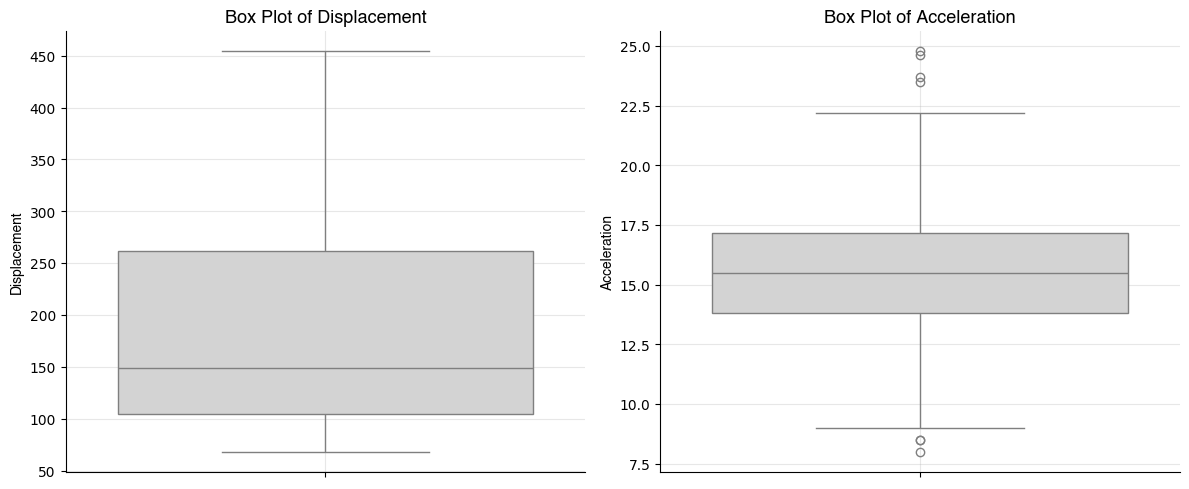

In [67]:
# box plot for `displacement` and `acceleration`
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# box plot for displacement
sns.boxplot(y=data['displacement'], color='lightgrey', ax=axes[0])
axes[0].set_title('Box Plot of Displacement', family="Helvetica", fontsize=13)
axes[0].set_ylabel('Displacement', fontsize=10, family="Helvetica")

# box plot for acceleration
sns.boxplot(y=data['acceleration'], color='lightgrey', ax=axes[1])
axes[1].set_title('Box Plot of Acceleration', family="Helvetica", fontsize=13)
axes[1].set_ylabel('Acceleration', fontsize=10, family="Helvetica")


# aesthetics for box plot
for _, ax in enumerate(axes):
    ax.grid(alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

As one can see, the IQR of `displacement` is wider and the variable do not contain any outliers, while the distribution of `acceleration` is much more concentrated around its median and do present outliers.

**Density Plot: Kernel Density Estimation (KDE)**

What is KDE?
Let us suppose that $X$ is a univariate continuous random variable with unknown probability density function (pdf) $f_X$.
Assume we observe an i.i.d. sample:
$$
\mathbf{x} = (x_1, x_2, \dots, x_n)^\top,
\qquad x_i \overset{\text{i.i.d.}}{\sim} f_X.
$$
The goal of **kernel density estimation (KDE)** is to construct a *nonparametric* estimator $\hat f_h$ of $f_X$
without assuming a specific parametric family (e.g. Gaussian).

A standard univariate KDE is defined, for any evaluation point $x \in \mathbb{R}$, as
$$
\hat f_h(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - x_i),
$$
where the **scaled kernel** $K_h$ is
$$
K_h(u) = \frac{1}{h} K\!\left(\frac{u}{h}\right),
\qquad h > 0.
$$
Equivalently,
$$
\hat f_h(x) = \frac{1}{n h} \sum_{i=1}^n K\!\left(\frac{x - x_i}{h}\right).
$$

- The **kernel** $K : \mathbb{R} \to \mathbb{R}$ is typically a smooth, non-negative function satisfying:

    $$
    K(u) \ge 0
    \quad \text{and} \quad
    \int_{-\infty}^{\infty} K(u)\,du = 1.
    $$

Common choices include the Gaussian kernels.

- The **bandwidth** $h$ is a smoothing parameter controlling how spread out each kernel contribution is:
    $$
    h \downarrow 0 \;\Rightarrow\; \hat f_h \text{ becomes less smooth},
    \qquad
    h \uparrow \;\Rightarrow\; \hat f_h \text{ becomes smoother}.
    $$


**Intuition for the KDE**

In my opinion, it is useful to see KDE as a continuous analogue of a histogram:

1. Place a small density “bump” $K_h(\cdot - x_i)$ at each observation $x_i$.
2. Sum these bumps over all observations.
3. Average by $n$ so that the result integrates to one.

Each observation contributes locally to $\hat f_h(x)$, with its influence decreasing as $|x - x_i|$ increases.
The bandwidth $h$ governs the **bias–variance trade-off**:
- Small $h$: low bias, high variance (overfitting).
- Large $h$: higher bias, lower variance (oversmoothing).

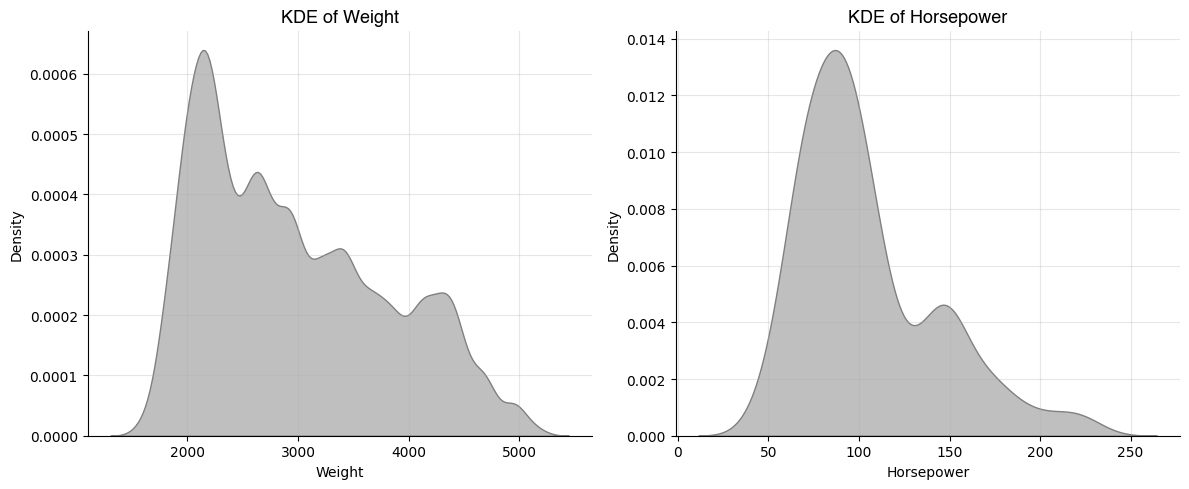

In [52]:
# kernel density estimate (KDE) plots for `weight` and `horsepower`
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KDE for weight (we can play with bandwidth using bw_adjust parameter to see its effect)
sns.kdeplot(data['weight'], fill=True, color='grey', alpha=0.5, ax=axes[0], bw_adjust=0.4)
axes[0].set_title('KDE of Weight', family="Helvetica", fontsize=13)
axes[0].set_xlabel('Weight', fontsize=10)
axes[0].set_ylabel('Density', fontsize=10)

# KDE for horsepower
sns.kdeplot(data['horsepower'], fill=True, color='grey', alpha=0.5, ax=axes[1])
axes[1].set_title('KDE of Horsepower', family="Helvetica", fontsize=13)
axes[1].set_xlabel('Horsepower', fontsize=10)
axes[1].set_ylabel('Density', fontsize=10)

# aesthetics for KDE plots
for _, ax in enumerate(axes):
    ax.grid(alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

As one can see, the density is less smooth for `weight` because I adjusted downward the bandwith parameter, thus introducing more variability.

**Visualizing Discrete Data**

So far, we have intentionally only visualized real continuous variable. However, in machine learning we also encouter *ordinal*, *categorical*, discrete data. The visualizations techniques are slightly different for a univariate exploration but the **bar plot** is useful to visualize the proportion of each category in the sample.

Below, I realize an example with `cylinders` and `origin`.

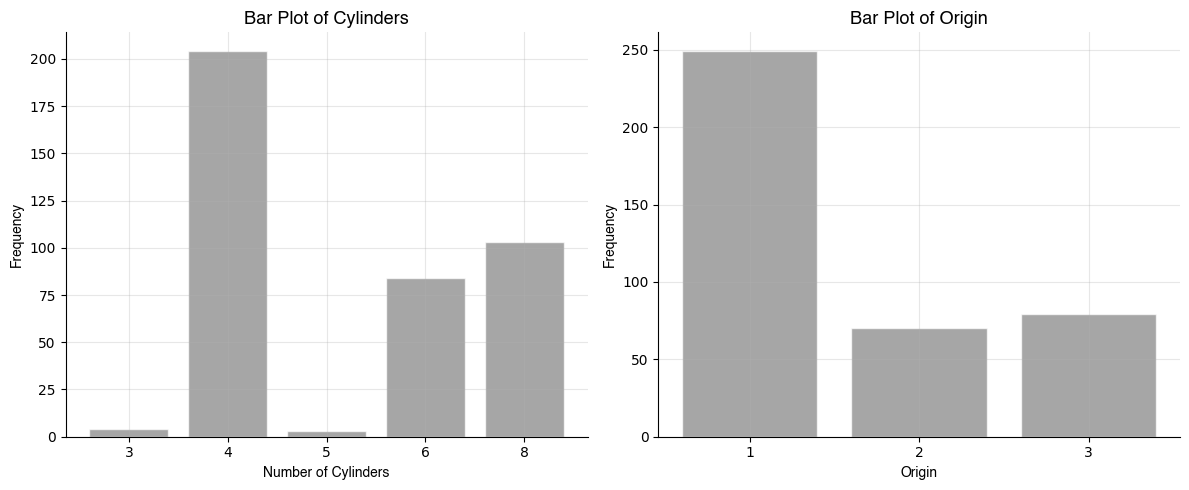

In [65]:
# bar plot for 'cylinders' (discrete) variable and 'origin' (categorical) variable
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# prepare data for bar plots
df_cylinders = data['cylinders'].value_counts().sort_index() # counts of each cylinder category
df_origin = data['origin'].value_counts().sort_index() # counts of each origin category

# bar plot for cylinders
axes[0].bar(df_cylinders.index.astype(str), df_cylinders.values, color='grey', alpha=0.7, edgecolor='white')
axes[0].set_title('Bar Plot of Cylinders', family="Helvetica", fontsize=13)
axes[0].set_xlabel('Number of Cylinders', fontsize=10, family="Helvetica")
axes[0].set_ylabel('Frequency', fontsize=10, family="Helvetica")

# bar plot for origin
axes[1].bar(df_origin.index.astype(str), df_origin.values, color='grey', alpha=0.7, edgecolor='white')
axes[1].set_title('Bar Plot of Origin', family="Helvetica", fontsize=13)
axes[1].set_xlabel('Origin', fontsize=10, family="Helvetica")
axes[1].set_ylabel('Frequency', fontsize=10, family="Helvetica")

# aesthetics for bar plots
for _, ax in enumerate(axes):
    ax.grid(alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**Conclusion on Univariate EDA**

In the end, many more plotting techniques (also more complex ones from a mathematical point of view) exist but these are usually the one we select for an initial univariate EDA. Here, the focus is to understand the **distribution** of the variables and spot extreme outliers (might be the result of a mistake in data entry or NaN encodin) or skewness. Once this step has been realized, we typically move to multivariate EDA.

### 3.2. Mutlivariate EDA

Multivariate EDA aims to **understand how variables jointly vary**, co-move, and potentially interact, with the goal of detecting structure (clusters, gradients, regimes), diagnosing data quality issues (we are never really finished with this step), and forming defensible hypotheses for subsequent modeling. Usually, the best practice is to begin with well-defined questions like "which covariates explain most variation in the target, conditional on others?", ensure comparability through appropriate scaling and transformations (notably for heavy-tailed variables), and stratify by meaningful subgroups to uncover heterogeneity that is masked in pooled summaries (a taste of this later). Because multivariate visuals can be fragile to overplotting and spurious patterns, robust EDA emphasizes (i) triangulation across complementary views (pairwise, conditional, and projection-based summaries), (ii) explicit treatment of missingness as an analyzable feature rather than a nuisance, (iii) clear separation between exploratory patterns and confirmatory claims, and (iv) a reproducible workflow where plotting choices (binning, smoothing, sampling, and axis limits) are documented and sensitivity-checked (I do not adopt such an extensive approach but in profesionnal settings, these extra layers of rigor should be considered).

**The Standards for Plotting in Python: `Matplotlib` and `Seaborn`**


In practice, I mostly rely on `Seaborn` and `Matplotlib`. They form a complementary stack for multivariate EDA: Seaborn provides high-level, statistically oriented plotting primitives that accelerate consistent exploration (e.g., pairwise plots, faceting, and distributional comparisons), while Matplotlib offers fine-grained control needed to refine figure geometry, annotations, and publication-ready formatting. A typical workflow uses Seaborn to rapidly scan the joint distribution of features via pairwise scatter and density views (for continuous variables), correlation heatmaps (for linear association screening), and faceted plots that condition on a categorical variable to reveal subgroup-specific relationships; these can be extended with hue/size/style encodings to incorporate additional dimensions when interpretability is preserved. `Matplotlib` is then used to mitigate common multivariate pitfall, such as overplotting (via transparency and sampling), misleading scale effects (via explicit axis transforms), and cluttered legends (by controlling layout, tick formatting, shared axes, and targeted annotations). Used together, `Seaborn` structures the exploratory sweep across many variable combinations, and `Matplotlib` supports the disciplined refinement that makes multivariate insights readable.

**The Classic Scatter Plots**

To undertsand how variables are linearily correlated to each other, the regular 2D scatter plots are really efficient. Furthermore, for low dimensionality data sets like ours, `Seaborn` provides a really neat function:

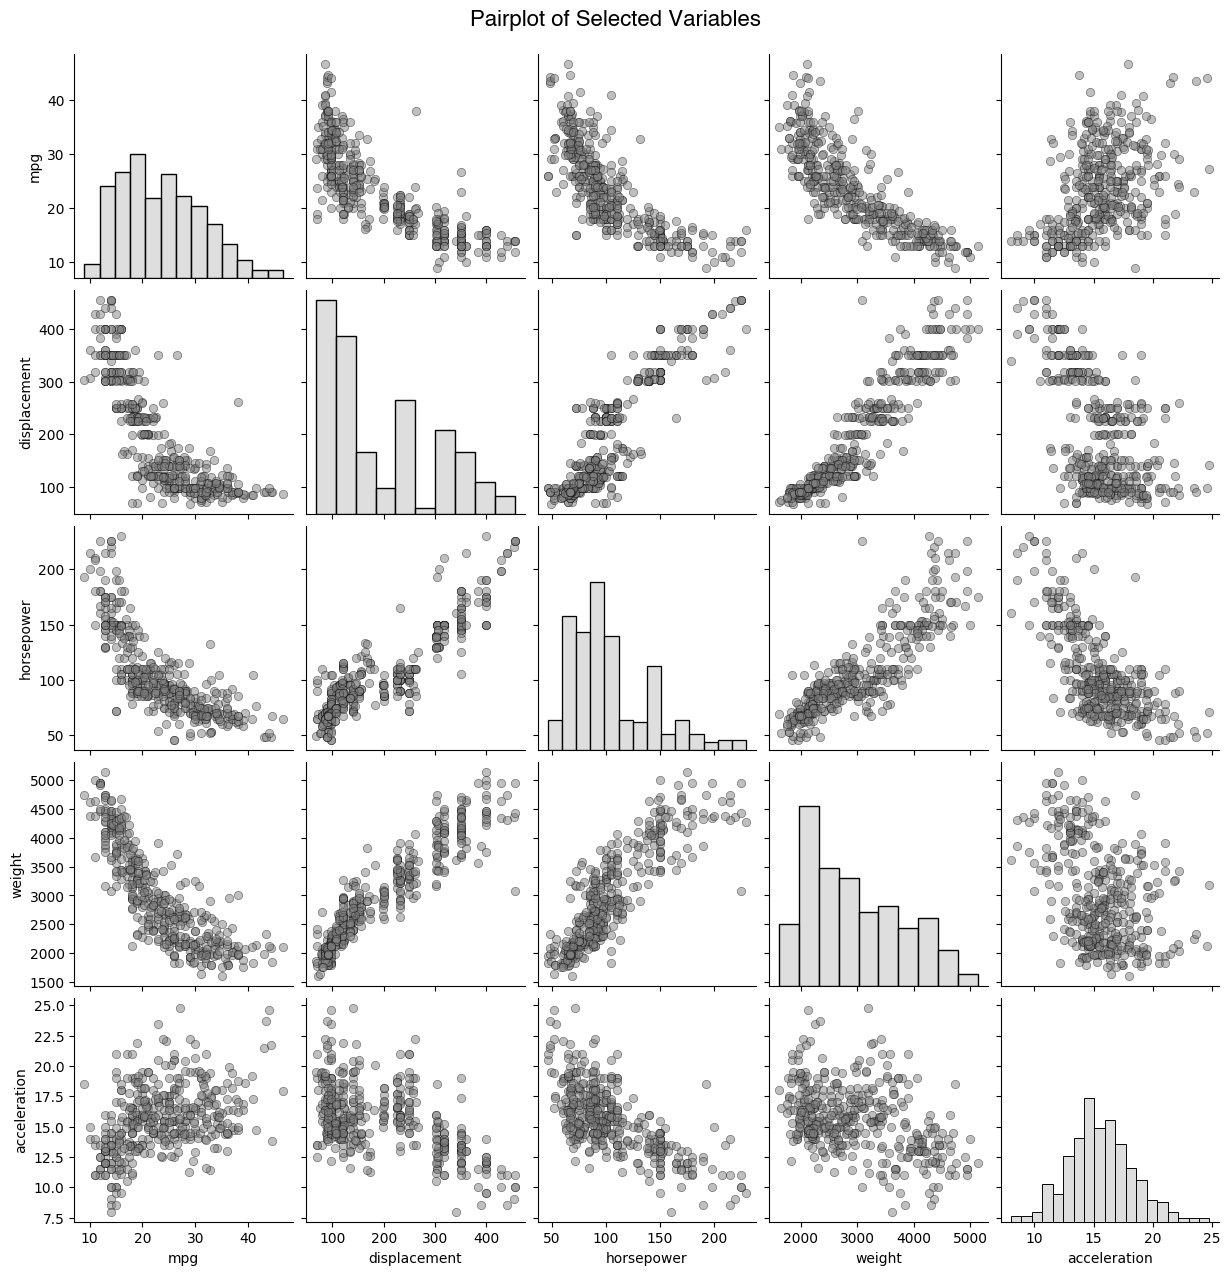

In [85]:
# Seaborn pairplot to visualize relationships between variables
# I selected only continuous variables for better clarity
selected_vars = ['mpg', 'displacement', 'horsepower',
                 'weight', 'acceleration']

sns.pairplot(data[selected_vars], diag_kind='hist',
             plot_kws={'alpha':0.5, 'edgecolor':'k', 'color':'grey'},
             diag_kws={'color':'lightgrey'})
plt.suptitle('Pairplot of Selected Variables', y=1.02, family="Helvetica", fontsize=16)
plt.show()


**Interpretation**

With this pairplot, we observe structured multivariate relationship among the variables, dominated by engine size and mass effects.

+ `mpg` exhibits clear negative, nonlinear associations with `displacement`, `horsepower`, and `weight`: heavier and more powerful cars are systematically less fuel-efficient. The curvature suggests diminishing returns rather than a purely linear trade-off (possibly decaying exponential or quadratic I thing).

+ `displacement`, `horsepower`, and `weight` are strongly positively correlated with each other, indicating substantial multicollinearity. These variables probably largely capture the same underlying construct: vehicle size/power.

+ `acceleration` is more weakly related to the other variables and shows higher dispersion, suggesting it adds partially independent information and may play a different role in modeling.

Overall, the plot suggests that fuel efficiency is primarily explained by a low-dimensional latent factor related to vehicle size, while acceleration contributes secondary variation.

**Then what?**

At this stage, the datascientist's brain should already be boiling with multiple questions and idea: "which feature should I create to capture efficiently the variability in `mpg`"? "If I control for `weight` and `horsepower`, is displacement still able to explain a lot of variability"? 
As stated above, the EDA should serve a particular purpose: designing meaningful features and selecting only a subset of them if necessary / possible. It should not be done just for the sake of it!

**Non-linear Relationships** (Section based on Hastie et al. (2009, p. 98))

In this section, I demonstrate how we further test the relationship between two features is really non-linear. I assume that the reader has some familiarity with the linear regression, in particular the OLS method. I will focus on the link between `horsepower` and `mpg`. First, I plot a scatter plot of those two features:

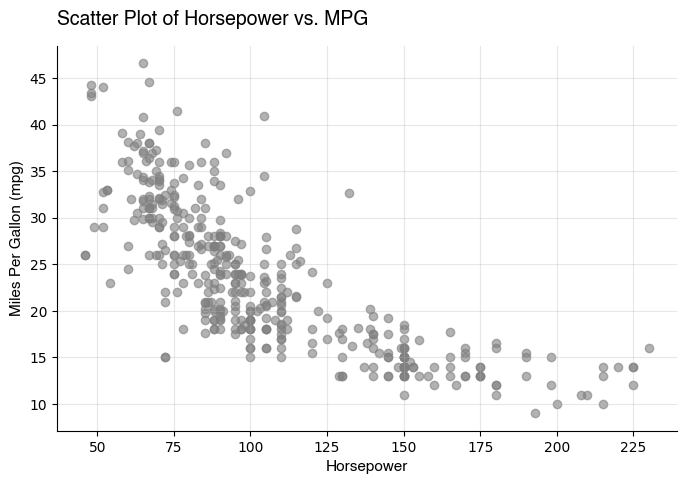

In [90]:
# scatter plot of 'displacement' vs 'mpg'
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data['horsepower'], data['mpg'], color='grey', alpha=0.6)

# customizing the plot
ax.set_title('Scatter Plot of Horsepower vs. MPG', family="Helvetica", fontsize=14, loc='left', pad=15)
ax.set_xlabel('Horsepower', fontsize=11, family="Helvetica")
ax.set_ylabel('Miles Per Gallon (mpg)', fontsize=11, family="Helvetica")
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

When we see such a plot, we are immediately strukc by the fact that the relationship between the `horsepower` and the `mpg` is not a linear one. Indeed, to demonstrate this, we can use two different specifications for a linear regression (recall that a linear regression in linear in its *parameters* only).

The first regression is given by:

$$
\texttt{mpg} = \alpha^{(1)} + \beta_1^{(1)} \cdot \texttt{horsepower} + \varepsilon^{(1)}
$$

And in the second regression we attempt to capture the non-linear effect of `horsepower` on `mpg`:

$$
\texttt{mpg} = \alpha^{(2)} + \beta_1^{(2)} \cdot \texttt{horsepower} + \beta_2^{(2)} \cdot \texttt{horsepower}^2 + \varepsilon^{(2)}
$$

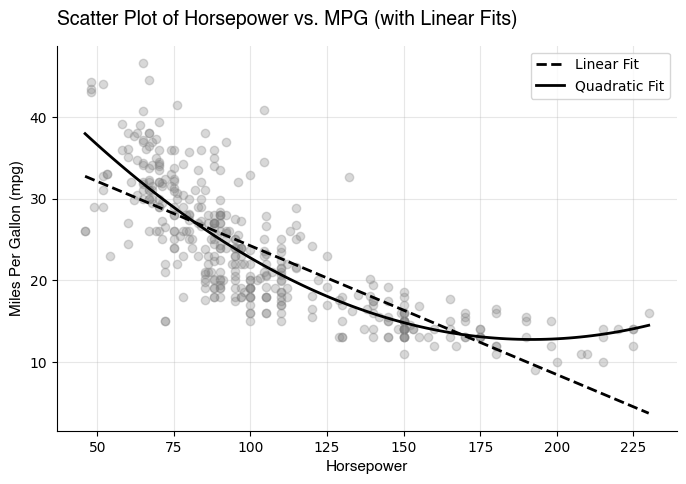

In [93]:
# prepare the features
y = data['mpg'] # target variable
x1 = data['horsepower'] # feature variable 1
x2 = data['horsepower']**2 # feature variable 2 (quadratic term)

# fitting the linear regression models
from sklearn.linear_model import LinearRegression

# first model (no quadratic term)
model_1 = LinearRegression()
X1 = x1.values.reshape(-1, 1)
model_1.fit(X1, y)

# second model (with quadratic term)
model_2 = LinearRegression()
X2 = np.column_stack((x1, x2))
model_2.fit(X2, y)

# generating predictions for plotting the regression lines
x_range = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 100)
y_pred_1 = model_1.predict(x_range.reshape(-1, 1))
y_pred_2 = model_2.predict(np.column_stack((x_range, x_range**2)))

# plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data['horsepower'], data['mpg'], color='grey', alpha=0.3)
ax.plot(x_range, y_pred_1, color='black', linestyle='--', linewidth=2, label='Linear Fit')
ax.plot(x_range, y_pred_2, color='black', linestyle='-', linewidth=2, label='Quadratic Fit')
ax.legend()

# customizing the plot
ax.set_title('Scatter Plot of Horsepower vs. MPG (with Linear Fits)', family="Helvetica", fontsize=14, loc='left', pad=15)
ax.set_xlabel('Horsepower', fontsize=11, family="Helvetica")
ax.set_ylabel('Miles Per Gallon (mpg)', fontsize=11, family="Helvetica")
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show the plot
plt.show()

As one can see the "quadratic fit" seems to better accomodate the data. Indeed, if we compute the mean squared error and the $R^2$ score (more on these metrics later) for both models, we have:

In [99]:
# mse calculation function
from sklearn.metrics import mean_squared_error

def calculate_mse(model, X, y_true):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    return mse

# calculate MSE for both models
mse_model_1 = calculate_mse(model_1, X1, y)
mse_model_2 = calculate_mse(model_2, X2, y)

print(f'Mean Squared Error (Linear Model): {mse_model_1:.2f}')
print(f'Mean Squared Error (Quadratic Model): {mse_model_2:.2f}')

# R2 calculation function
from sklearn.metrics import r2_score
def calculate_r2(model, X, y_true):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    return r2

# calculate R2 for both models
r2_model_1 = calculate_r2(model_1, X1, y)
r2_model_2 = calculate_r2(model_2, X2, y)

print(f'r2-score (Linear Model): {r2_model_1:.4f}')
print(f'r2-score (Quadratic Model): {r2_model_2:.4f}')

Mean Squared Error (Linear Model): 24.67
Mean Squared Error (Quadratic Model): 20.08
r2-score (Linear Model): 0.5951
r2-score (Quadratic Model): 0.6705


And we see that the second model better fit the data and is able to explain more variance in them. This means that during the feature engineering part, we will typically add a feature to capture this non-linearity, such as $\texttt{horsepower}^2$.

**High Collinearity**

Another interesting thing we observed earlier is the fact that `horsepower` and `weight` seem highly correlated and since our sample is small, $398$ observations, another feature can sometimes only add more noise. Now, we want to inspect if `weight` is able to explain some variance in `mpg` once that `horsepower` has been accounted for. To test this intuitivelly, we can use those two linear regressions:

$$
\texttt{mpg} = \alpha^{(1)} + \beta_1^{(1)} \cdot \texttt{horsepower} + \varepsilon^{(1)}
$$

and a second one with the `weight`:

$$
\texttt{mpg} = \alpha^{(2)} + \beta_1^{(2)} \cdot \texttt{horsepower} + \beta_2^{(2)} \cdot \texttt{weight} + \varepsilon^{(2)}
$$

In [101]:
import statsmodels.api as sm

# prepare features and target variable for multiple linear regression
X1 = data['horsepower'].to_numpy().reshape(-1, 1)
X2 = data[['horsepower', 'weight']].to_numpy().reshape(-1, 2)
y = data['mpg'].to_numpy().reshape(-1, 1)

# fitting multiple linear regression models
M1 = sm.OLS(y, sm.add_constant(X1)).fit() # adding constant for intercept
M2 = sm.OLS(y, sm.add_constant(X2)).fit() # same here ...

# model summaries
print("Multiple Linear Regression Model 1 Summary (horsepower only):")
print(M1.summary())


Multiple Linear Regression Model 1 Summary (horsepower only):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     582.1
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           9.26e-80
Time:                        11:39:42   Log-Likelihood:                -1202.7
No. Observations:                 398   AIC:                             2409.
Df Residuals:                     396   BIC:                             2417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [102]:

print("\nMultiple Linear Regression Model 2 Summary (horsepower and weight):")
print(M2.summary())


Multiple Linear Regression Model 2 Summary (horsepower and weight):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.1
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          4.53e-105
Time:                        11:39:46   Log-Likelihood:                -1140.5
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     395   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

We see that the coefficient on horsepower shrinks a lot (meaning it was probably acting also as a proxy for heavier vehicles in the first regression, i.e. $\beta_1^{(1)}$ was suffering from *omitted variable bias*). Furthermore, the $R^2$ score imrpoved, meaning we should keep `weight` in the model. Then, we can also see the warning "The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems." Probably due to the fact that `horsepower` and `weight` are not on the same scale and also that they are highly correlated. This brings us to another visual.

**The Correlation Matrix Heatmap**

This visual helps us identify the strength of the correlation among features.

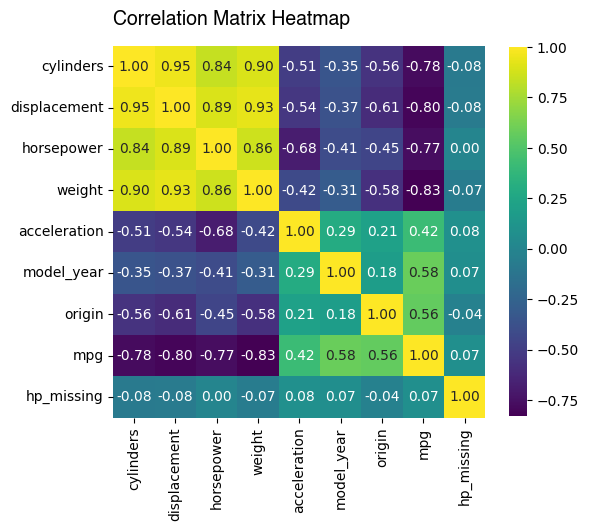

In [109]:
# heatmap of correlation matrix
corr_matrix = data.drop(columns=['car_name']).corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', family="Helvetica", fontsize=14, loc='left', pad=15)
plt.show()

It is good to observe that all the features correlate highly with `mpg` and it is also interesting to see that, as we suspected, `horsepower`, `displacement`, `weight`, and `cylinders` are highly correlated, thus probably conveying the same kind of information but still marginally improving the quality of the predictions. At this stage, the typical data scientist already know that he will likely adopt regularization techniques such as Ridge or Lasso, or opt for dimensionality reduction with principal component analysis (PCA).

**Adding dimensions to a scatter plot**

In this final example, we study how we can add dimensionality to a 2D scatter plot.

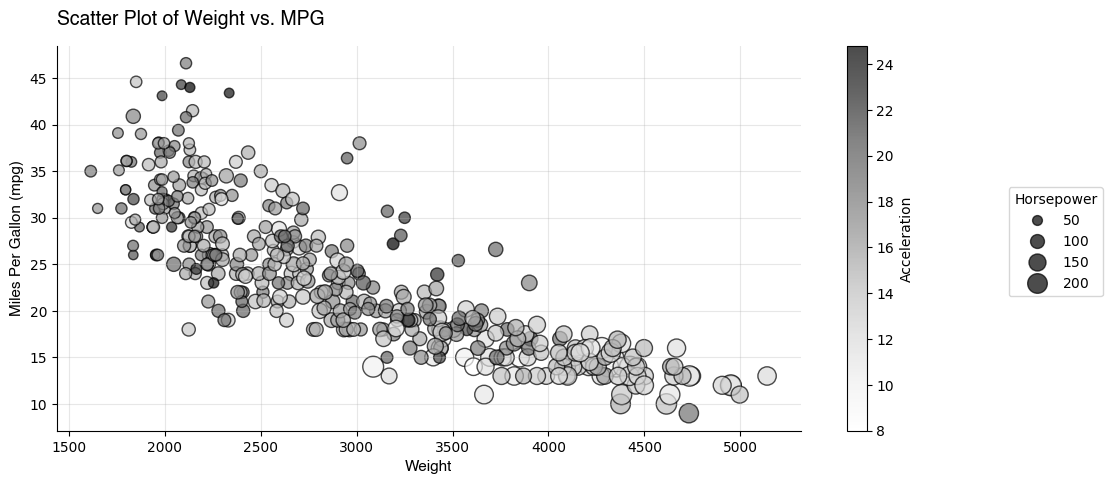

In [117]:
# scatter plot of 'weight' vs 'mpg' with acceleration as color hue and horsepower as size
fig, ax = plt.subplots(figsize=(12, 5))
scatter = ax.scatter(data['weight'], data['mpg'],
                      c=data['acceleration'], s=data['horsepower'],
                      cmap='Greys', alpha=0.7, edgecolor='k')

# customizing the plot
fig.colorbar(scatter, ax=ax, label='Acceleration')
fig.legend(*scatter.legend_elements("sizes", num=5), title="Horsepower", loc='center right')
ax.set_title('Scatter Plot of Weight vs. MPG', family="Helvetica", fontsize=14, loc='left', pad=15)
ax.set_xlabel('Weight', fontsize=11, family="Helvetica")
ax.set_ylabel('Miles Per Gallon (mpg)', fontsize=11, family="Helvetica")
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

The storyline that emerges is: `weight` has a non-linear negative relation with `mpg` and `acceleration` tends to be lower for heavier vehicles (meaning they are taking less time to reach a given speed) while `horsepower` is typically higher for heavier vehicles. None of these observations are new but this nicely illustrates how we can add dimensionality to a scatter plot.

**Density Plot with Categorical Variables**

Finally, let us see if the KDE of `mpg` conditional on `origin` are different. If they are, this means that `origin` is able to explain some variability in the data and can enhance the predictions.

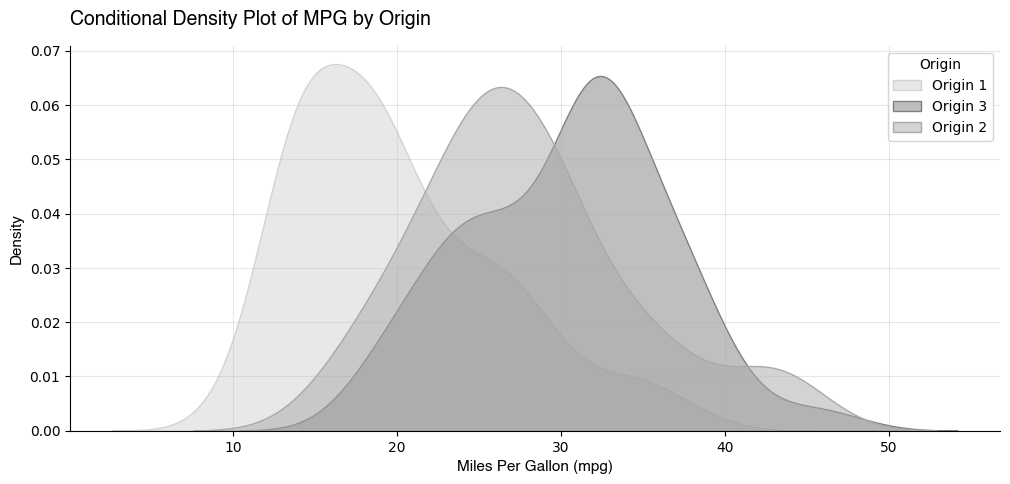

In [120]:
# conditional density plot of 'mpg' given 'origin'
fig, ax = plt.subplots(figsize=(12, 5))

# plot KDEs for each origin category
three_greys = ['lightgrey', 'grey', 'darkgrey']
origins = data['origin'].unique()
for origin, color in zip(origins, three_greys):
    subset = data[data['origin'] == origin]
    sns.kdeplot(subset['mpg'], fill=True, alpha=0.5, label=f'Origin {origin}', color=color, ax=ax)
# customizing the plot
ax.set_title('Conditional Density Plot of MPG by Origin', family="Helvetica", fontsize=14, loc='left', pad=15)
ax.set_xlabel('Miles Per Gallon (mpg)', fontsize=11, family="Helvetica")
ax.set_ylabel('Density', fontsize=11, family="Helvetica")
ax.legend(title='Origin')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Here, it is possible that `origin` is acting as a proxy for another variable (e.g. vehicles of country 1 are heavier) but we at least see that the conditional KDE are different (clearly different center of mass).

### 3.3. Conclusion on the EDA

Of course, the EDA conducted above is not exhaustive but generated interesting insights for the following steps, namely data scaling and feature engineering, as well as the modelling decisions we will take later on.

## <a id = "part4" style = "color: inherit;">4. Domain Knowledge</a>

A critical step in any applied data science project is to move beyond purely statistical associations and examine whether observed relationships are consistent with domain knowledge. Variables do not exist in isolation: they are measurements of physical or economic processes, and their interpretation must be grounded in an understanding of how those processes operate in reality. In this section, a subset of features from the *Auto MPG* dataset is examined in detail to illustrate how domain reasoning informs data interpretation prior to modelling.

#### `displacement`

Displacement measures the total volume of all cylinders in an engine, typically expressed in cubic inches. From a mechanical perspective, larger displacement engines are capable of combusting more fuel–air mixture per cycle, allowing them to generate greater power. However, this increased power capacity comes at the cost of higher fuel consumption.

In the context of the Auto MPG dataset, vehicles with larger engine displacement are therefore expected to exhibit lower fuel efficiency (measured in miles per gallon). This relationship reflects a fundamental engineering trade-off between power and efficiency, rather than a purely empirical correlation. As such, displacement is a structurally meaningful predictor of fuel economy (what we observed).

#### `weight`

The weight variable represents the mass of the vehicle. Heavier vehicles require more energy to accelerate and to overcome rolling resistance and inertia, leading to higher fuel consumption for a given distance travelled. From a physics standpoint, increased mass directly increases the energy required to perform mechanical work.

Consequently, weight is expected to be negatively associated with fuel efficiency in the Auto MPG dataset. Importantly, weight also serves as a proxy for other design characteristics—such as vehicle size, safety features, and structural reinforcement—that are not directly observed in the data. This makes it an informative but potentially confounded feature.

#### `horsepower`

Horsepower quantifies the engine’s power output. Higher horsepower typically reflects engines designed for performance rather than efficiency, enabling higher speeds and faster acceleration. While not all high-horsepower engines are inherently inefficient, greater power capacity generally implies higher fuel consumption under typical driving conditions.

In the dataset, horsepower may therefore be negatively related to fuel efficiency. However, unlike displacement or weight, horsepower is also influenced by tuning choices and technological factors, which may introduce additional variability and measurement noise. This highlights the importance of considering both the physical meaning of a variable and the quality of its measurement.

#### `origin`

The origin variable encodes the year in which a vehicle was manufactured. Unlike the other features discussed, model year does not directly describe a physical attribute of the vehicle. Instead, it captures technological progress and regulatory change over time, including improvements in engine design, aerodynamics, and fuel efficiency standards.

As a result, newer vehicles are generally expected to achieve higher fuel efficiency than older ones, even when controlling for size or power. In this sense, model year acts as a proxy for unobserved technological advancements. Its inclusion illustrates how some variables derive their predictive value from broader economic and regulatory trends rather than direct mechanical mechanisms.

#### Summary

The examination of these features illustrates that meaningful data analysis requires an understanding of what variables represent and why they may be related to the outcome of interest (usually the data scientist is not the one conducting this step and he will receive domain knowledge from specialized people). In the `Auto MPG` dataset, relationships between predictors and fuel efficiency are largely grounded in physical principles and historical developments so it is important to have this domain knowledge to not re-invent the wheel (i.e. discovering patterns that are already well documented in physics).

## <a id = "part5" style = "color: inherit;">5. Quality of Fit and Train-Test Split</a>

In my multivariate EDA, I used mutliple times a linear regression estimated by the Ordinary Least Squared (OLS) algorithm, which is one of the simpliest machine learning algorithm there is. Then I "fitted" the model on the data (meaning that the algorithm estimates the parameters of my model) and proceeded to realize predictions for $y$ (`mpg`) based on $X$ (a subset of the features). Basically, I was computing:

$$
\hat{y}^{(i)} = \hat{\beta}_0 + \sum_{i = 1}^{k} \hat{\beta}_k \cdot x_k^{(i)} 
$$

where the $\hat{}$ denotes estimated quantities. Now, once that I estimated $y^{(i)}$ with $\hat{y}^{(i)}$, how can I evaluate the goodness of the fit (i.e. how close are my predictions $\hat{y}^{(i)}$ from reality $y^{(i)}$?). For a regression task, one of the gold standard in the ML community is the *mean squared error* (MSE):

$$
\mathrm{MSE} = \frac{1}{n} \sum_{i = 1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

where $n$ is the total number of estimations. If all my estimates are perfect, we have $y^{(i)} = \hat{y}^{(i)}, \forall i \in \{1, \cdots, n\}$ and the MSE will thus be $0$. In the end, the further away I am based on the actual data, the higher the MSE. Now, if we want to be precise we should specify that the MSE we computed above was the *training* MSE (the data our model used to estimate the paramters by minimizing the MSE). However, as Hastie et al. (2009, p. 28) puts it:

<div style="
    margin: 0 auto;
    width: 60vw;
    text-align: justify;
    padding-left: 2vw;
    border-left: 3px solid #000000ff;
">
    <p style="font-family: 'Georgia';">
        <em>In general, we do not really care how well the method works on the training data.
        Rather, we are interested in the accuracy of the predictions that we obtain when we apply our method to previously unseen
        test data. Why is this what we care about? Suppose that we are interested test data
        in developing an algorithm to predict a stock’s price based on previous
        stock returns. We can train the method using stock returns from the past
        6 months. But we don’t really care how well our method predicts last week’s
        stock price. We instead care about how well it will predict tomorrow’s price
        or next month’s price</em>.
    </p>
</div>

In essence, we care about how well our model will perform once it is in production, i.e. used in real life with unseen data. To estimate this, it is therefore fundamental to keep an untouched test set in all of our machine learning projects. The performance metrics are always more meaningful on the test set because our models could typically *overfit* or *underfit* on training data (see what is <a href = "https://en.wikipedia.org/wiki/Bias–variance_tradeoff">the bias-variance trade-off</a>). In the code below, I demonstrate how to proceed to a train test split with `scikit-learn`.

In [122]:
# train test split
from sklearn.model_selection import train_test_split

# 70% train, 30% test split
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

# verify the split
print('\nTrain-Test Split Verification\n-------------------------------')
print(f'Training Set Size: {df_train.shape[0]} samples')
print(f'Testing Set Size: {df_test.shape[0]} samples')
print(f'Training Set MPG Mean: {df_train["mpg"].mean():.2f}')
print(f'Testing Set MPG Mean: {df_test["mpg"].mean():.2f}')


Train-Test Split Verification
-------------------------------
Training Set Size: 278 samples
Testing Set Size: 120 samples
Training Set MPG Mean: 23.45
Testing Set MPG Mean: 23.67


As one can see, the train-test split seems valid and we don't need further stratifying techniques since the `mpg` mean is very close in both data sets. As of now, it is of the utter important of working only on the train set (some could argue rightfully that we should have done this right at the beginning).

## <a id = "part6" style = "color: inherit;">6. Further Steps</a>

Having established a basic understanding of the dataset and introduced the rationale for separating data into training and test sets, the subsequent stages of a machine learning workflow typically involve transforming the raw inputs into model-ready features, defining a simple baseline model, and progressively exploring more flexible modelling approaches. This is followed by model selection and hyperparameter tuning, usually conducted within a resampling framework to control overfitting, before arriving at a final model whose predictive performance is evaluated on previously unseen data. These steps form the core of a standard predictive pipeline, but are intentionally not developed here, as the focus of this notebook is to lay the conceptual foundations required for their rigorous application in later analyses.

## References

- Behrens, J. T. (1997). Principles and procedures of exploratory data analysis. *Psychological methods*, 2(2), 131.

- Emmanuel, T., Maupong, T., Mpoeleng, D., Semong, T., Mphago, B., & Tabona, O. (2021). A survey on missing data in machine learning. *Journal of Big data*, 8(1), 140.

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *An introduction to statistical learning*.